In [1]:
import pandas as pd
import numpy as np
import datetime
from functools import reduce
import matplotlib.pyplot as plt
from scipy.stats import linregress

covid_re = pd.read_csv("Final Merge 7_16_20.csv")
covid_pdr = pd.read_csv("pop_density.csv")

# new data frame with split value columns 
pop_den = covid_pdr["Population_Density"].str.split("/", n = 1, expand = True) 
county = covid_pdr["County"].str.split(",", n = 1, expand = True) 
covid_pd = pd.DataFrame({"Population_Density": pop_den[0], "County" : county[0]}) 
covid_pd['Population_Density'] = covid_pd['Population_Density'].astype(float)
covid_pd["County"] = covid_pd["County"] + ' County'
covid_all = covid_re.drop(columns=['Unnamed: 0'])

covid_all = pd.merge(covid_re, covid_pd, on = "County", how="outer")

covid_all.to_csv("Final Merge 7_17_20.csv")

covid_rep = covid_all[covid_all.Political_Party == "Republican"]
covid_dem = covid_all[covid_all.Political_Party == "Democratic"]
covid_dem

,Unnamed: 0,County,NewPos_All,Age 0-19_cases,Age 20-39_cases,Age 40-59_cases,Age 60-79_cases,Age 80+_cases,Positive UnkAge_cases,Deaths,...,Political_Party,Percent Below Poverty Level,Household Income Median,Household Income Mean,Population,Pop_per100k,Case_per100k,Deaths_per100k,Hoptializations_per100k,Population_Density
4,4,Clallam County,43.0,6.0,15.0,10.0,10.0,2.0,0.0,0.0,...,Democratic,15.9,49913.0,65858.0,77331.0,0.77331,55.605126,0.000000,3.879427,27.0
5,5,Clark County,922.0,94.0,335.0,304.0,145.0,44.0,0.0,30.0,...,Democratic,9.3,71636.0,91321.0,488241.0,4.88241,188.841167,6.144507,22.734674,667.9
12,12,Island County,198.0,6.0,41.0,57.0,57.0,37.0,0.0,12.0,...,Democratic,8.6,64809.0,82310.0,85141.0,0.85141,232.555408,14.094267,29.363057,152.6
13,13,Jefferson County,39.0,2.0,8.0,7.0,20.0,2.0,0.0,0.0,...,Democratic,13.3,54471.0,72540.0,32221.0,0.32221,121.039074,0.000000,21.724962,13.7
14,14,King County,10941.0,811.0,3850.0,3312.0,2042.0,922.0,4.0,620.0,...,Democratic,9.5,89418.0,120828.0,2252782.0,22.52782,485.666167,27.521527,78.880247,870.9
15,15,Kitsap County,243.0,17.0,78.0,91.0,47.0,10.0,0.0,2.0,...,Democratic,9.7,71610.0,89103.0,271473.0,2.71473,89.511664,0.736722,11.419183,448.1
21,21,Pacific County,18.0,2.0,7.0,7.0,2.0,0.0,0.0,1.0,...,Democratic,17.4,44846.0,55824.0,22471.0,0.22471,80.103244,4.450180,0.000000,16.9
23,23,Pierce County,2804.0,189.0,1036.0,923.0,495.0,158.0,3.0,107.0,...,Democratic,11.2,67868.0,85781.0,904980.0,9.04980,309.841101,11.823466,44.089372,449.9
24,24,San Juan County,19.0,2.0,2.0,10.0,3.0,2.0,0.0,0.0,...,Democratic,11.4,60711.0,87861.0,17582.0,0.17582,108.065067,0.000000,5.687635,25.5
25,25,Skagit County,549.0,55.0,178.0,184.0,97.0,34.0,1.0,15.0,...,Democratic,12.8,62865.0,81114.0,129205.0,1.29205,424.906157,11.609458,45.663867,61.6


R value =  0.1
R squared =  0.01
p value = 0.5631494008241555 , significant at the alpha of .05


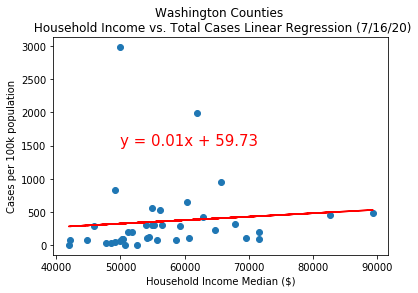

In [2]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Household Income Median"], covid_all["Case_per100k"])
regress_values = covid_all["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Household Income Median"], covid_all["Case_per100k"])
plt.plot(covid_all["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(50000,1500),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Counties \n Household Income vs. Total Cases Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/rega_i_c.png")

R value =  0.28
R squared =  0.08
p value = 0.1818452565521895 , significant at the alpha of .05


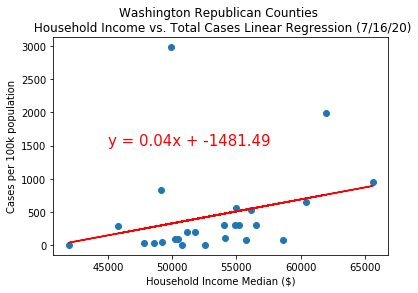

In [3]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_rep["Household Income Median"], covid_rep["Case_per100k"])
regress_values = covid_rep["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_rep["Household Income Median"], covid_rep["Case_per100k"])
plt.plot(covid_rep["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(45000,1500),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Republican Counties \n Household Income vs. Total Cases Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regr_i_c.png")

R value =  0.69
R squared =  0.48
p value = 0.0058881592904625815 , significant at the alpha of .05


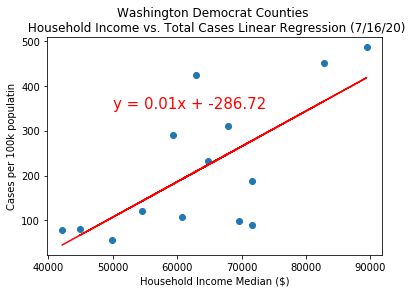

In [4]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dem["Household Income Median"], covid_dem["Case_per100k"])
regress_values = covid_dem["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_dem["Household Income Median"], covid_dem["Case_per100k"])
plt.plot(covid_dem["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(50000,350),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Cases per 100k populatin')    
plt.title("Washington Democrat Counties \n Household Income vs. Total Cases Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regd_i_c.png")

R value =  0.31
R squared =  0.1
p value = 0.054398641582970905 , significant at the alpha of .05


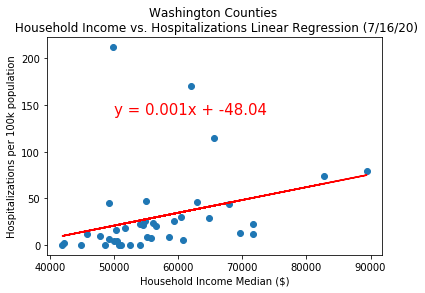

In [5]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Household Income Median"], covid_all["Hoptializations_per100k"])
regress_values = covid_all["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Household Income Median"], covid_all["Hoptializations_per100k"])
plt.plot(covid_all["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(50000,140),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Hospitalizations per 100k population')    
plt.title("Washington Counties \n Household Income vs. Hospitalizations Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/rega_i_h.png")

R value =  0.36
R squared =  0.13
p value = 0.07523998396944442 , significant at the alpha of .05


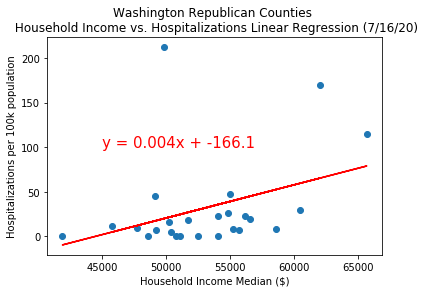

In [6]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_rep["Household Income Median"], covid_rep["Hoptializations_per100k"])
regress_values = covid_rep["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(covid_rep["Household Income Median"], covid_rep["Hoptializations_per100k"])
plt.plot(covid_rep["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(45000,100),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Hospitalizations per 100k population')    
plt.title("Washington Republican Counties \n Household Income vs. Hospitalizations Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regr_i_h.png")

R value =  0.8
R squared =  0.64
p value = 0.0005929976999931672 , significant at the alpha of .05


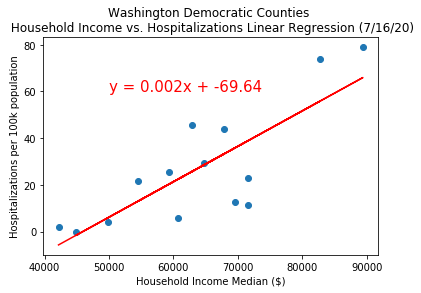

In [7]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dem["Household Income Median"], covid_dem["Hoptializations_per100k"])
regress_values = covid_dem["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(covid_dem["Household Income Median"], covid_dem["Hoptializations_per100k"])
plt.plot(covid_dem["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(50000,60),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Hospitalizations per 100k population')    
plt.title("Washington Democratic Counties \n Household Income vs. Hospitalizations Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regd_i_h.png")

R value =  0.34
R squared =  0.11
p value = 0.03601050544112323 , significant at the alpha of .05


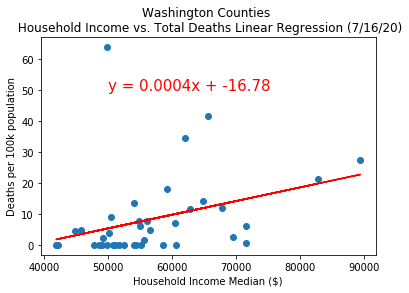

In [8]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Household Income Median"], covid_all["Deaths_per100k"])
regress_values = covid_all["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Household Income Median"], covid_all["Deaths_per100k"])
plt.plot(covid_all["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(50000,50),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Deaths per 100k population')    
plt.title("Washington Counties \n Household Income vs. Total Deaths Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/rega_i_d.png")

R value =  0.35
R squared =  0.12
p value = 0.08709111564494057 , significant at the alpha of .05


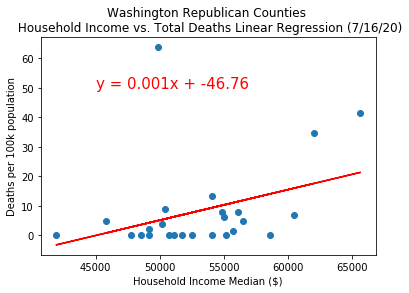

In [9]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_rep["Household Income Median"], covid_rep["Deaths_per100k"])
regress_values = covid_rep["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(covid_rep["Household Income Median"], covid_rep["Deaths_per100k"])
plt.plot(covid_rep["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(45000,50),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Deaths per 100k population')    
plt.title("Washington Republican Counties \n Household Income vs. Total Deaths Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regr_i_d.png")

R value =  0.68
R squared =  0.46
p value = 0.0075699906208925305 , significant at the alpha of .05


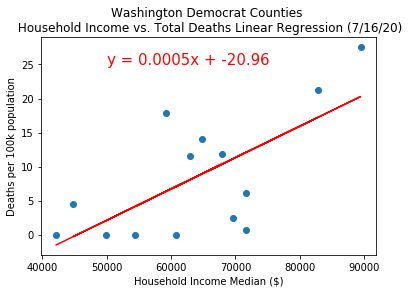

In [10]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dem["Household Income Median"], covid_dem["Deaths_per100k"])
regress_values = covid_dem["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(covid_dem["Household Income Median"], covid_dem["Deaths_per100k"])
plt.plot(covid_dem["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(50000,25),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Deaths per 100k population')    
plt.title("Washington Democrat Counties \n Household Income vs. Total Deaths Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regd_i_d.png")

R value =  0.17
R squared =  0.03
p value = 0.311087370717961 , significant at the alpha of .05


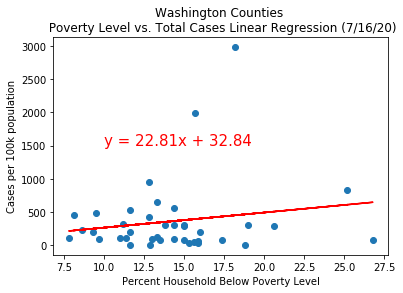

In [11]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Percent Below Poverty Level"], covid_all["Case_per100k"])
regress_values = covid_all["Percent Below Poverty Level"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Percent Below Poverty Level"], covid_all["Case_per100k"])
plt.plot(covid_all["Percent Below Poverty Level"],regress_values,"r-")
plt.annotate(line_eq,(10,1500),fontsize=15,color="red")
plt.xlabel('Percent Household Below Poverty Level')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Counties \n Poverty Level vs. Total Cases Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/rega_p_c.png")

R value =  0.26
R squared =  0.07
p value = 0.21504445759455285 , significant at the alpha of .05


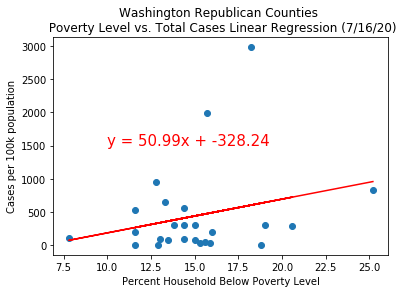

In [12]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_rep["Percent Below Poverty Level"], covid_rep["Case_per100k"])
regress_values = covid_rep["Percent Below Poverty Level"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_rep["Percent Below Poverty Level"], covid_rep["Case_per100k"])
plt.plot(covid_rep["Percent Below Poverty Level"],regress_values,"r-")
plt.annotate(line_eq,(10,1500),fontsize=15,color="red")
plt.xlabel('Percent Household Below Poverty Level')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Republican Counties \n Poverty Level vs. Total Cases Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regr_p_c.png")

R value =  -0.44
R squared =  0.2
p value = 0.11146653199079957 , significant at the alpha of .05


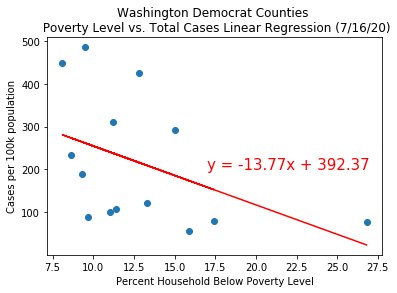

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dem["Percent Below Poverty Level"], covid_dem["Case_per100k"])
regress_values = covid_dem["Percent Below Poverty Level"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_dem["Percent Below Poverty Level"], covid_dem["Case_per100k"])
plt.plot(covid_dem["Percent Below Poverty Level"],regress_values,"r-")
plt.annotate(line_eq,(17,200),fontsize=15,color="red")
plt.xlabel('Percent Household Below Poverty Level')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Democrat Counties \n Poverty Level vs. Total Cases Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regd_p_c.png")

R value =  0.02
R squared =  0.0
p value = 0.911741145560811 , significant at the alpha of .05


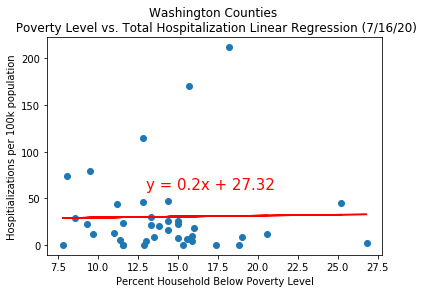

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Percent Below Poverty Level"], covid_all["Hoptializations_per100k"])
regress_values = covid_all["Percent Below Poverty Level"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Percent Below Poverty Level"], covid_all["Hoptializations_per100k"])
plt.plot(covid_all["Percent Below Poverty Level"],regress_values,"r-")
plt.annotate(line_eq,(13,60),fontsize=15,color="red")
plt.xlabel('Percent Household Below Poverty Level')
plt.ylabel('Hospitializations per 100k population')    
plt.title("Washington Counties \n Poverty Level vs. Total Hospitalization Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/rega_p_h.png")

R value =  0.2
R squared =  0.04
p value = 0.3384515025532401 , significant at the alpha of .05


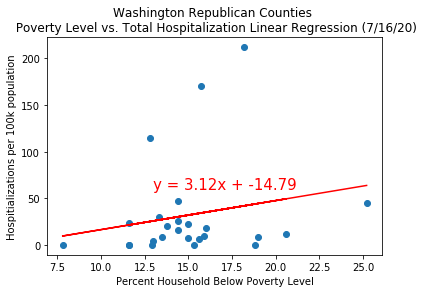

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_rep["Percent Below Poverty Level"], covid_rep["Hoptializations_per100k"])
regress_values = covid_rep["Percent Below Poverty Level"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_rep["Percent Below Poverty Level"], covid_rep["Hoptializations_per100k"])
plt.plot(covid_rep["Percent Below Poverty Level"],regress_values,"r-")
plt.annotate(line_eq,(13,60),fontsize=15,color="red")
plt.xlabel('Percent Household Below Poverty Level')
plt.ylabel('Hospitializations per 100k population')    
plt.title("Washington Republican Counties \n Poverty Level vs. Total Hospitalization Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regr_p_h.png")

R value =  -0.53
R squared =  0.28
p value = 0.04945686519585462 , significant at the alpha of .05


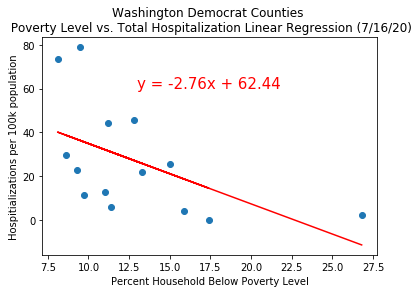

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dem["Percent Below Poverty Level"], covid_dem["Hoptializations_per100k"])
regress_values = covid_dem["Percent Below Poverty Level"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_dem["Percent Below Poverty Level"], covid_dem["Hoptializations_per100k"])
plt.plot(covid_dem["Percent Below Poverty Level"],regress_values,"r-")
plt.annotate(line_eq,(13,60),fontsize=15,color="red")
plt.xlabel('Percent Household Below Poverty Level')
plt.ylabel('Hospitializations per 100k population')    
plt.title("Washington Democrat Counties \n Poverty Level vs. Total Hospitalization Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regd_p_h.png")

R value =  -0.07
R squared =  0.01
p value = 0.650288880528832 , significant at the alpha of .05


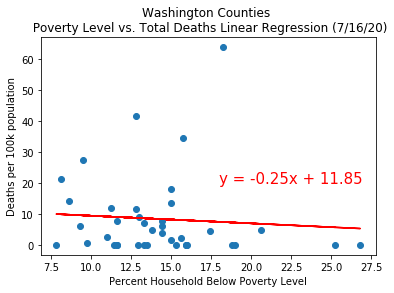

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Percent Below Poverty Level"], covid_all["Deaths_per100k"])
regress_values = covid_all["Percent Below Poverty Level"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Percent Below Poverty Level"], covid_all["Deaths_per100k"])
plt.plot(covid_all["Percent Below Poverty Level"],regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
plt.xlabel('Percent Household Below Poverty Level')
plt.ylabel('Deaths per 100k population')    
plt.title("Washington Counties \n Poverty Level vs. Total Deaths Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/rega_p_d.png")

R value =  0.07
R squared =  0.0
p value = 0.7430599055175879 , significant at the alpha of .05


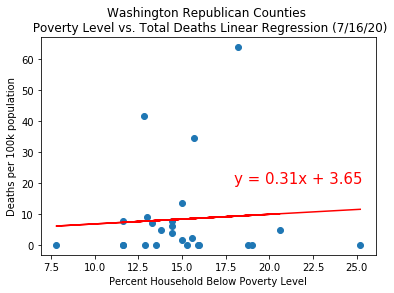

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_rep["Percent Below Poverty Level"], covid_rep["Deaths_per100k"])
regress_values = covid_rep["Percent Below Poverty Level"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_rep["Percent Below Poverty Level"], covid_rep["Deaths_per100k"])
plt.plot(covid_rep["Percent Below Poverty Level"],regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
plt.xlabel('Percent Household Below Poverty Level')
plt.ylabel('Deaths per 100k population')    
plt.title("Washington Republican Counties \n Poverty Level vs. Total Deaths Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regr_p_d.png")

R value =  -0.42
R squared =  0.18
p value = 0.13323620218613808 , significant at the alpha of .05


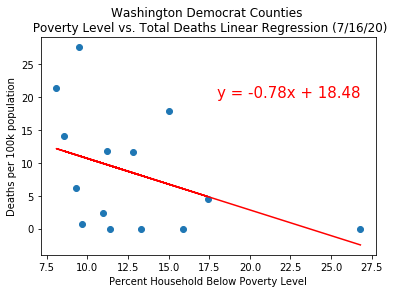

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dem["Percent Below Poverty Level"], covid_dem["Deaths_per100k"])
regress_values = covid_dem["Percent Below Poverty Level"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_dem["Percent Below Poverty Level"], covid_dem["Deaths_per100k"])
plt.plot(covid_dem["Percent Below Poverty Level"],regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
plt.xlabel('Percent Household Below Poverty Level')
plt.ylabel('Deaths per 100k population')    
plt.title("Washington Democrat Counties \n Poverty Level vs. Total Deaths Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regd_p_d.png")

R value =  0.18
R squared =  0.03
p value = 0.26070692276892704 , significant at the alpha of .05


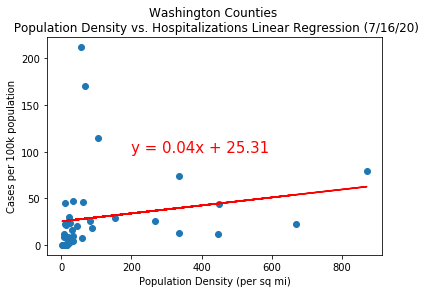

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Population_Density"], covid_all["Hoptializations_per100k"])
regress_values = covid_all["Population_Density"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Population_Density"], covid_all["Hoptializations_per100k"])
plt.plot(covid_all["Population_Density"],regress_values,"r-")
plt.annotate(line_eq,(200,100),fontsize=15,color="red")
plt.xlabel('Population Density (per sq mi)')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Counties \n Population Density vs. Hospitalizations Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/rega_d_c.png")

R value =  0.27
R squared =  0.07
p value = 0.19664152685622743 , significant at the alpha of .05


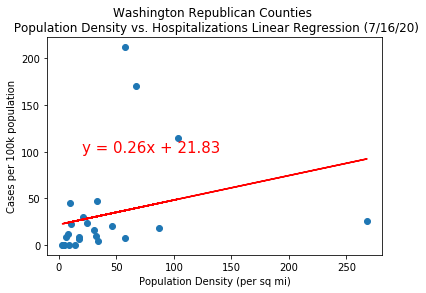

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_rep["Population_Density"], covid_rep["Hoptializations_per100k"])
regress_values = covid_rep["Population_Density"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_rep["Population_Density"], covid_rep["Hoptializations_per100k"])
plt.plot(covid_rep["Population_Density"],regress_values,"r-")
plt.annotate(line_eq,(20,100),fontsize=15,color="red")
plt.xlabel('Population Density (per sq mi)')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Republican Counties \n Population Density vs. Hospitalizations Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regr_d_c.png")

R value =  0.59
R squared =  0.34
p value = 0.027837116955421716 , significant at the alpha of .05


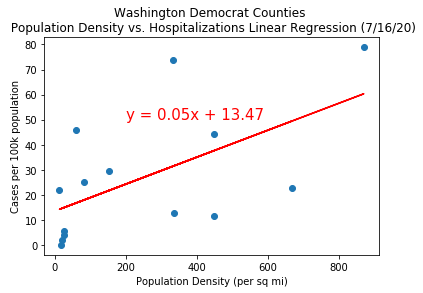

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dem["Population_Density"], covid_dem["Hoptializations_per100k"])
regress_values = covid_dem["Population_Density"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_dem["Population_Density"], covid_dem["Hoptializations_per100k"])
plt.plot(covid_dem["Population_Density"],regress_values,"r-")
plt.annotate(line_eq,(200,50),fontsize=15,color="red")
plt.xlabel('Population Density (per sq mi)')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Democrat Counties \n Population Density vs. Hospitalizations Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regd_d_c.png")